In [200]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ElementTree
import seaborn as sns
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)

Data Loading and Exploration

In [201]:
tree = ElementTree.parse('switchtdb.xml')
root = tree.getroot()

game_list = []

def extract_tag(element, prefix=""):
    tag_dict = {}
    
    # Extract attributes
    for attribute, value in element.attrib.items():
        tag_dict[prefix + attribute] = value

    # Extract text value
    if len(element) == 0:
        tag_dict[prefix.rstrip('_')] = element.text

    # Extract nested elements
    for child in element:
        tag_dict.update(extract_tag(child, prefix=prefix + child.tag + '_'))

    return tag_dict

for game in root.findall('.//game'):
    data = extract_tag(game)
    game_list.append(data)

df = pd.DataFrame(game_list)

In [202]:
df.head(15)

,name,id,type,region,languages,locale_lang,locale_title,locale_synopsis,developer,publisher,date_year,date_month,date_day,date,genre,wi-fi_players,wi-fi,input_players,input_control_type,input_control_required,input_control,mode_tv,mode_handheld,mode_tabletop,mode,rom_version,rom_firmware,rom_name,rom_size,rom_crc,rom_md5,rom_sha1,rom,date_EUR_year,date_EUR_month,date_EUR_day,date_EUR,date_KOR_year,date_KOR_month,date_KOR_day,date_KOR,rating_PEGI_value,rating_PEGI,rating_CSRR_value,rating_CSRR,date_JPN_year,date_JPN_month,date_JPN_day,date_JPN,rating_CERO_value,rating_CERO,date_USA_year,date_USA_month,date_USA_day,date_USA,rating_ESRB_value,rating_ESRB,rating_ESRB_descriptor_ESRB,rating_PEGI_descriptor_PEGI,rating_CERO_descriptor_CERO,case_versions,case,rating_GRB_value,rating_GRB,case_color,rating_GRB_descriptor_GRB,rating_CSRR_descriptor_CSRR,wi-fi_feature,save_size,save
0,Quest Contents Install Tool (EN),1CGNA,Switch,USA,EN,EN,Quest Contents Install Tool,NOA P/N 106669\nQuest Contents Install Tool (U...,Nintendo,Nintendo,2017,,,None,"demo,sampler,software",0,NaN,1,procontroller,false,None,true,true,true,None,1.0.3,4.1.0,Quest Contents Install Tool (EN) (v1.0.3).switch,31943819264,20a8858f,c4bfa391ad1d8ea288d205b50b58ad72,b6b2861d4868413f42b5b53d106c72e7fa748702,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ni no Kuni II - Revenant Kingdom Prince's Edit...,A224A,Switch,"USA,EUR","EN,FR,DE,ES,IT,RU",EN,Ni no Kuni II - Revenant Kingdom Prince's Edition,None,NaN,None,2023,,,None,NaN,0,NaN,1,procontroller,false,None,true,true,true,None,,NaN,Ni no Kuni II - Revenant Kingdom Prince's Edit...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ni no Kuni II - Revenant Kingdom - All in One ...,A224B,Switch,JPN,"EN,JA",EN,Ni no Kuni II - Revenant Kingdom - All in One ...,None,NaN,None,2021,,,None,NaN,0,NaN,1,procontroller,false,None,true,true,true,None,,NaN,Ni no Kuni II - Revenant Kingdom - All in One ...,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Monster Fruit Academy (EN,FR,JA,KO,ZHCN)",A225B,Switch,ALL,"EN,FR,JA,KO,ZHCN",EN,Monster Fruit Academy,Monster Fruit Academy is an exciting parkour-s...,NaN,WOWWOW Technology,,,,None,"action,adventure,party",0,NaN,4,procontroller,false,None,true,true,true,None,1.0.0,NaN,"Monster Fruit Academy (EN,FR,JA,KO,ZHCN) (v1.0...",1996488704,87352a73,a24578fa65d64316720aa737ab0bc0f1,be6a4bd3d1c5dd597f5c079fee163d89075c7387,None,2022,2,3,NaN,2023,5,26,NaN,3,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MODEL Debut2 #nicola (JA),A22AA,Switch,JPN,JA,JA,MODEL Debut2 #nicola/モデルデビュー2 ニコラ,None,NaN,FuRyu,,,,None,NaN,0,NaN,1,procontroller,false,None,true,true,true,None,,NaN,MODEL Debut2 #nicola (JA).switch,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,11,4,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Model Debut 2 #Nicola (JA,KO,ZHCN)",A22AB,Switch,"KOR,TWN,CHN","JA,KO,ZHCN",EN,Model Debut 2 #Nicola,This work is a model simulation game in which ...,NaN,ARC SYSTEM WORKS,2022,7,14,None,simulation,0,NaN,1,procontroller,false,None,true,true,true,None,,NaN,"Model Debut 2 #Nicola (JA,KO,ZHCN).switch",NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"PJ MASKS: HEROES OF THE NIGHT (EN,FR,DE,ES,IT,...",A22EA,Switch,EUR,"EN,FR,DE,ES,IT,NL,PT,SE,DK,NO,FI,AR,ZHCN,RU,PL",IT,PJ MASKS: EROI DELLA NOTTE,None,Petoons Studio,Outright Games,,,,None,"action,adventure,platformer",0,NaN,1,procontroller,false,None,true,true,tru

In [203]:
df.shape

(13327, 70)

Data Exploration

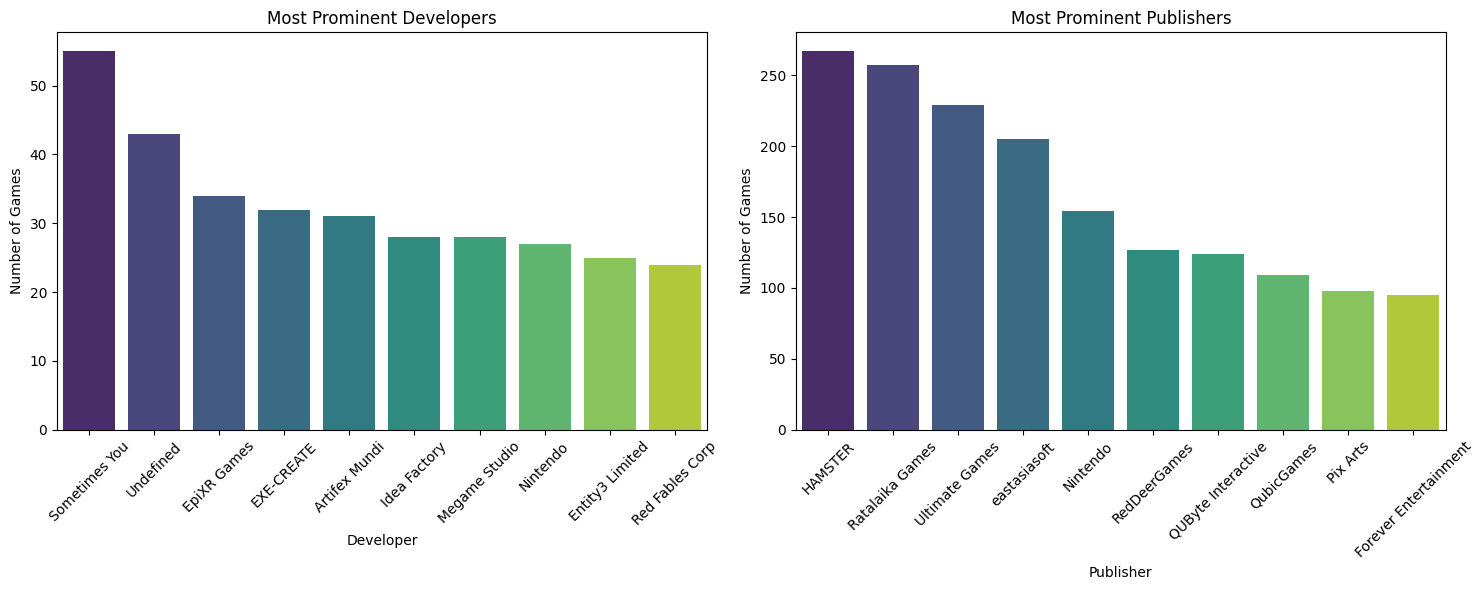

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

developer_counts = df['developer'].value_counts().head(10)
publisher_counts = df['publisher'].value_counts().head(10)

# plotting developer bar chart using Seaborn
sns.barplot(x=developer_counts.index, y=developer_counts, ax=ax1, palette='viridis', hue=developer_counts.index)
ax1.set_title('Most Prominent Developers')
ax1.set_xlabel('Developer')
ax1.set_ylabel('Number of Games')
ax1.tick_params(axis='x', rotation=45)  # adjust rotation for better visibility

# plotting publisher bar chart using Seaborn
sns.barplot(x=publisher_counts.index, y=publisher_counts, ax=ax2, palette='viridis', hue=publisher_counts.index)
ax2.set_title('Most Prominent Publishers')
ax2.set_xlabel('Publisher')
ax2.set_ylabel('Number of Games')
ax2.tick_params(axis='x', rotation=45)  # adjust rotation for better visibility

plt.tight_layout()
plt.show()

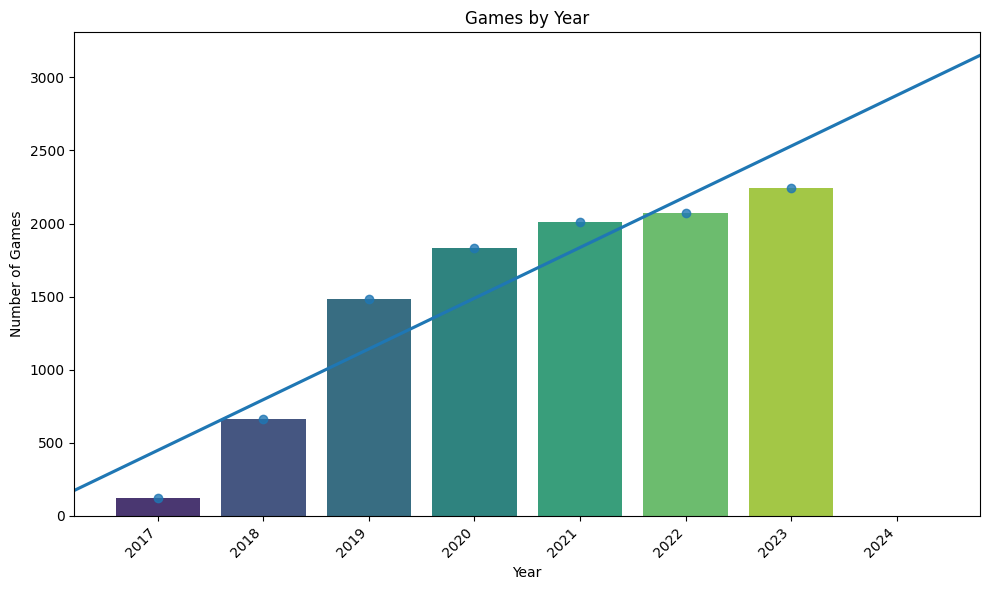

In [205]:
# count occurrences of each release year
filtered_df = df[(df['date_year'] != "") & (df['date_year'] != "2024")] # ignore null values for now
year_counts = filtered_df['date_year'].value_counts().head(10)
sorted_year_counts = year_counts.sort_index()

# plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sorted_year_counts.index.astype(int), y=sorted_year_counts.values.astype(int), palette='viridis', hue=sorted_year_counts.index)
plt.bar(x=["2024"], height=[0], alpha=0)

# regression plot to show likely value for 2024
sns.regplot(x=np.arange(len(sorted_year_counts)), y=sorted_year_counts.values.astype(int), ci=None, truncate=False, scatter=True)

plt.title('Games by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()

In [206]:
genre_counts = df['genre'].value_counts()

# Display the unique values and their counts
print(genre_counts[:25])

genre
adventure                        693
adventure,puzzle                 485
action,arcade                    447
puzzle                           323
action,adventure                 281
action                           276
role-playing                     228
adventure,simulation             203
simulation                       163
action,adventure,platformer      139
action,adventure,role-playing    127
action,role-playing              125
adventure,role-playing           117
arcade,action                    113
simulation,strategy              105
action,platformer                102
strategy                          91
puzzle,board game                 90
puzzle,adventure                  77
arcade,puzzle                     74
puzzle,strategy                   69
adventure,action                  69
action,adventure,arcade           68
adventure,platformer              61
arcade                            60
Name: count, dtype: int64


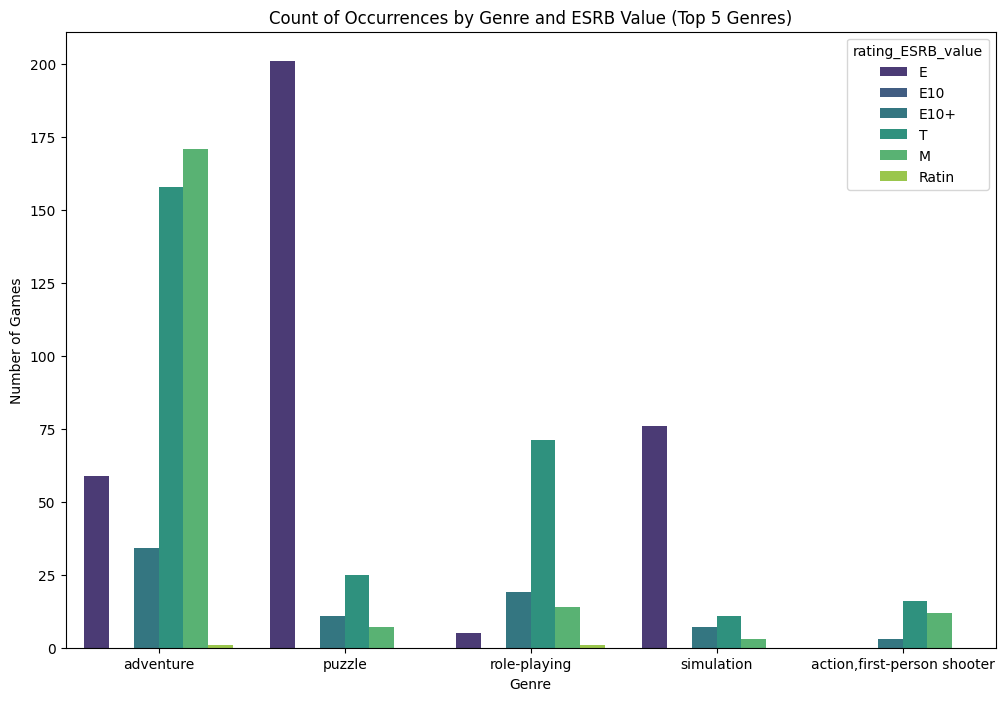

In [207]:
genres = ["adventure", "puzzle", "role-playing", "simulation", "action,first-person shooter"]

# # Filter the dataset to include only the top genres
filtered_df = df[df['genre'].isin(genres)]
desired_order = ['E', 'E10', 'E10+', 'T', 'M', 'Ratin']

# # Create a grouped bar chart
plt.figure(figsize=(12, 8))
# sns.countplot(x='genre', hue='rating_ESRB_value', data=filtered_df, order=df['genre'].value_counts().index, hue_order=desired_order, palette='viridis')
sns.countplot(x='genre', hue='rating_ESRB_value', data=filtered_df, order=filtered_df['genre'].value_counts().index, hue_order=desired_order, palette='viridis')
plt.title('Count of Occurrences by Genre and ESRB Value (Top 5 Genres)')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

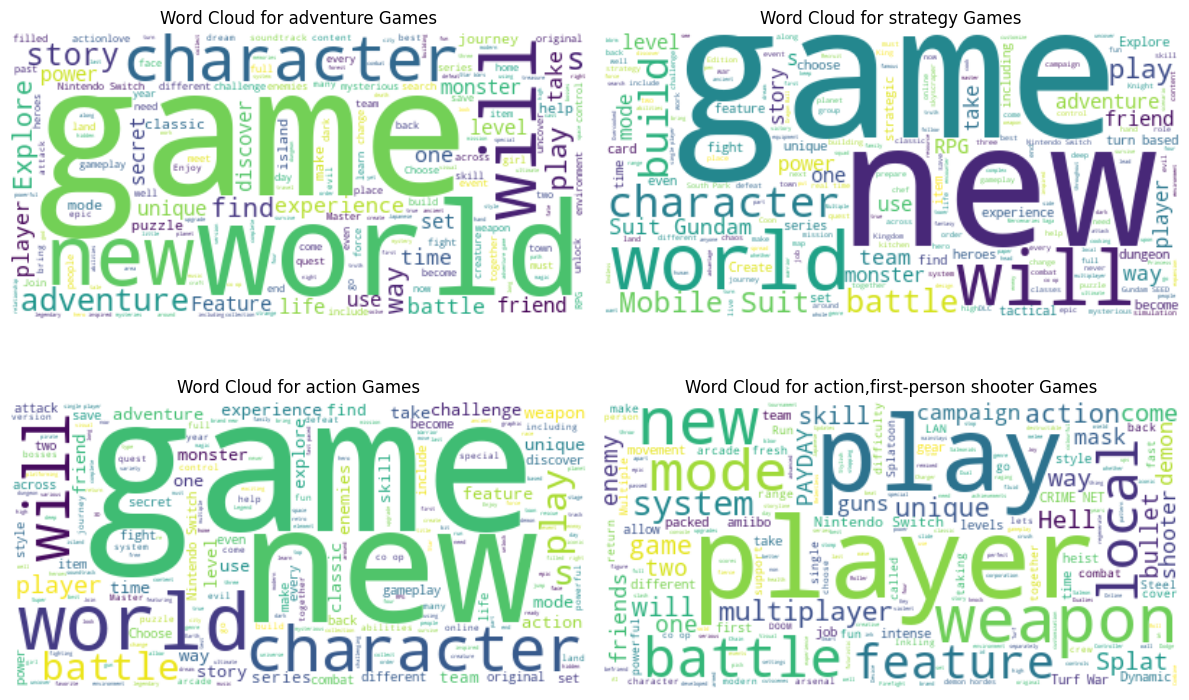

In [208]:
genres_to_plot = ['adventure', 'strategy', 'action', 'action,first-person shooter']

# Create a subplot grid based on the number of genres
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D array for easier indexing

for i, genre in enumerate(genres_to_plot):
    # Filter DataFrame for rows where 'genre' matches the desired genre and 'locale_synopsis' is not None
    genre_df = df[df['genre'].str.contains(genre, case=False, na=False) & df['locale_synopsis'].notnull()]

    # Concatenate all non-null 'locale_synopsis' for the selected genre
    text = ' '.join(list(genre_df['locale_synopsis']))

    # Create a WordCloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)

    # Plot the WordCloud on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Word Cloud for {genre} Games')

plt.tight_layout()
plt.show()

Data Cleaning

In [209]:
empty_columns = []
for column in df.columns:
    if df[column].isna().all() or (df[column].astype(str).str.strip() == '').all():
        empty_columns.append(column)
df.drop(columns=empty_columns, inplace=True)
df.columns

Index(['name', 'id', 'type', 'region', 'languages', 'locale_lang',
       'locale_title', 'locale_synopsis', 'developer', 'publisher',
       'date_year', 'date_month', 'date_day', 'genre', 'wi-fi_players',
       'input_players', 'input_control_type', 'input_control_required',
       'mode_tv', 'mode_handheld', 'mode_tabletop', 'rom_version',
       'rom_firmware', 'rom_name', 'rom_size', 'rom_crc', 'rom_md5',
       'rom_sha1', 'date_EUR_year', 'date_EUR_month', 'date_EUR_day',
       'date_KOR_year', 'date_KOR_month', 'date_KOR_day', 'rating_PEGI_value',
       'rating_CSRR_value', 'date_JPN_year', 'date_JPN_month', 'date_JPN_day',
       'rating_CERO_value', 'date_USA_year', 'date_USA_month', 'date_USA_day',
       'rating_ESRB_value', 'rating_ESRB_descriptor_ESRB',
       'rating_PEGI_descriptor_PEGI', 'rating_CERO_descriptor_CERO',
       'case_versions', 'rating_GRB_value', 'case_color',
       'rating_GRB_descriptor_GRB', 'rating_CSRR_descriptor_CSRR',
       'wi-fi_feature', '

In [210]:
columns_to_drop = [
       'name',                                             # repetitive with locale_title 
       'type',                                             # "Switch" for all entries; probably used internally by Nintendo
       'region',                                           
       'languages', 'locale_lang',                         # filtering by language, region, etc. is better done as a search filter
       'date_month',               
       'date_day',                                         # too specific; date_year should be enough to recommend games
       'input_control_type', 'input_control_required', 
       'mode_tv', 'mode_handheld', 'mode_tabletop',        # pretty much the same for every game
       "rom_version", "rom_firmware", "rom_name", 
       "rom_size", "rom_crc", "rom_md5", "rom_sha1",       # ROM information used by database creators; not relevant
       'date_EUR_year', 'date_EUR_month', 'date_EUR_day', 
       'date_JPN_year', 'date_JPN_month', 'date_JPN_day',
       'date_USA_year', 'date_USA_month', 'date_USA_day',
       'date_KOR_year', 'date_KOR_month', 'date_KOR_day',  # repetitive with date_year
       'rating_PEGI_value', 'rating_PEGI_descriptor_PEGI',
       'rating_CERO_value', 'rating_CERO_descriptor_CERO',
       'rating_CSRR_value', 'rating_CSRR_descriptor_CSRR',                        
       'rating_GRB_value',  'rating_GRB_descriptor_GRB',   # repetitive with rating_ESRB_value and genre
       'input_players',                                    # repetitive with game description
       'case_versions', 'case_color',                     
       'wi-fi_feature', 'save_size'                        # not too relevant, mostly for bookkeeping
]

df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['id', 'locale_title', 'locale_synopsis', 'developer', 'publisher',
       'date_year', 'genre', 'wi-fi_players', 'rating_ESRB_value',
       'rating_ESRB_descriptor_ESRB'],
      dtype='object')

In [211]:
null_counts = df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
print(sorted_null_counts)

locale_synopsis                12215
developer                       7675
rating_ESRB_descriptor_ESRB     7056
rating_ESRB_value               4302
genre                           1604
publisher                        642
id                                 0
locale_title                       0
date_year                          0
wi-fi_players                      0
dtype: int64


In [214]:
df.dropna()
df.head()

,id,locale_title,locale_synopsis,developer,publisher,date_year,genre,wi-fi_players,rating_ESRB_value,rating_ESRB_descriptor_ESRB
0,1CGNA,Quest Contents Install Tool,NOA P/N 106669\nQuest Contents Install Tool (U...,Nintendo,Nintendo,2017,"demo,sampler,software",0,NaN,NaN
1,A224A,Ni no Kuni II - Revenant Kingdom Prince's Edition,None,NaN,None,2023,NaN,0,NaN,NaN
2,A224B,Ni no Kuni II - Revenant Kingdom - All in One ...,None,NaN,None,2021,NaN,0,NaN,NaN
3,A225B,Monster Fruit Academy,Monster Fruit Academy is an exciting parkour-s...,NaN,WOWWOW Technology,,"action,adventure,party",0,NaN,NaN
4,A22AA,MODEL Debut2 #nicola/モデルデビュー2 ニコラ,None,NaN,FuRyu,,NaN,0,NaN,NaN
